# TP 4 APPRENTISSGE PROFOND

# Les forêts aléatoires

### fichier code

Notre dataset est 'diabetes.csv'.

## Bagging

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5,
max_features=0.5)

In [2]:
import pandas as pd
data = pd.read_csv('diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
X=pd.DataFrame(data, columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [5]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
# target -----> Outcome

y=data['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


In [9]:
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.7066473988439307


#### Question :
#### Construire la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test. Que pouvons-nous conclure ?

la variance est :  0.031137977068058577
la moyenne est :  0.6767485549132948


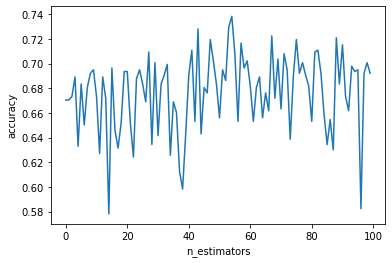

In [10]:
import matplotlib.pyplot as plt
N_tirages= 100
accuracies = []
for i in range(N_tirages):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    #print(accuracies[i])  

print("la variance est : " , np.std(accuracies))
print("la moyenne est : " , np.mean(accuracies))

plt.plot([i for i in range(N_tirages)], accuracies)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [11]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(),
max_samples=0.5, max_features=0.5, n_estimators=200)

In [12]:
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)

#### Question :
#### Calculer la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test.
#### Comparer avec la variance du classifieur de base. Que pouvons-nous conclure ?

la variance est :  0.018177099965234075
la moyenne est :  0.7306358381502889


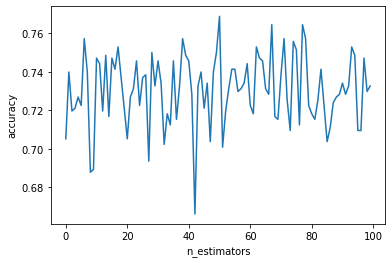

In [13]:
N_tirages= 100
accuracies = []
for i in range(N_tirages):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(),max_samples=0.5, max_features=0.5, n_estimators=200)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    #print(accuracies[i])  

print("la variance est : " , np.std(accuracies))
print("la moyenne est : " , np.mean(accuracies))

plt.plot([i for i in range(N_tirages)], accuracies)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

#### Question :
#### Construire le graphique accuracy vs n_estimators. Que constatez-vous ?

la variance est :  0.018177099965234075


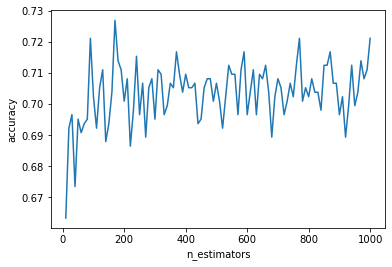

In [14]:
import matplotlib.pyplot as plt

N_tirages = 100
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)

for i in range(N_tirages):
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    #print((i+1)*10, accuracy[i])

print("la variance est : " , np.std(accuracies))

plt.plot([(i+1)*10 for i in range(N_tirages)], accuracy)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

#### Question :
#### Faites varier les parametres max_samples et max_features. Pour quelles valeurs on obtient le meilleur résultat ? On pourra notamment utiliser GridSearchCV pour réaliser une recherche systématique.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

param_grid = {
    'max_features' : [0.1, 0.2, 0.3, 0.4, 0.5],
    'max_samples' : [0.1, 0.2, 0.3, 0.4, 0.5]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),n_estimators = 100),param_grid)

clf.fit(X_train, y_train)
print("meilleure score : ",(clf.best_estimator_.score(X_train, y_train)))
print("meilleure paramètre : ",(clf.best_params_))

meilleure score :  0.9210526315789473
meilleure paramètre :  {'max_features': 0.5, 'max_samples': 0.4}


## Forêts aléatoires

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.90)

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [20]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.75


#### Question :
#### Comment la valeur de la variable accuracy se compare avec le cas bagging qui utilise le même nombre d’arbres (200 dans notre cas) ?

In [21]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z=clf.predict(X_test)
print("arbre de décision : " + str(clf.score(X_test, y_test)))

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z=clf.predict(X_test)
print("bagging 200 arbres : " + str(clf.score(X_test, y_test)))

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z=clf.predict(X_test)
print("random forest 200 arbes : " + str(clf.score(X_test, y_test)))

arbre de décision : 0.6965317919075145
bagging 200 arbres : 0.7442196531791907
random forest 200 arbes : 0.7543352601156069


#### Question :
#### Construire la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test. Que pouvons-nous conclure en comparant avec la séction précedente (bagging) ?

In [22]:
N_tirages = 100

bagging_accuracies = []
for i in range(N_tirages):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=200)
    clf.fit(X_train, y_train)
    bagging_accuracies.append(clf.score(X_test,y_test))
print("bagging : moyenne = ", np.mean(bagging_accuracies), "bagging : ecart-type = ", np.std(bagging_accuracies))



rf_accuracies = []
for i in range(N_tirages):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)
    clf = RandomForestClassifier(n_estimators=200)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))
print("random forest : moyenne = " , np.mean(rf_accuracies), "random forest : ecart-type = ", np.std(rf_accuracies))

bagging : moyenne =  0.727442196531792 bagging : ecart-type =  0.021595122560125673
random forest : moyenne =  0.7334682080924854 random forest : ecart-type =  0.02162548958040878


#### Question :
#### Construire le graphique accuracy vs n_estimators. Que constatez-vous ? A partir de quelle valeur on n’améliore plus ?

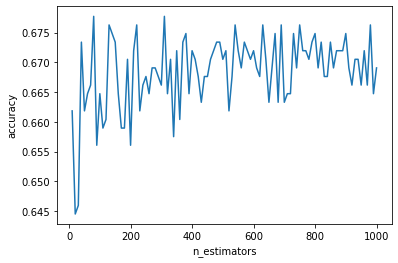

In [23]:
N_tirages = 100
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)

for i in range(N_tirages):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    #print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(N_tirages)], accuracy)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

#### Question :
#### Regardez dans la documentation les ExtraTreesClassifier et refaites la classification avec ce type de classifieur. Comparez avec RandomForestClassifier.

In [23]:
from sklearn.ensemble import ExtraTreesClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test,y_test)
print("Forêt aléatoire : " + str(accuracy))

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print("Extra Trees : " + str(accuracy))

Forêt aléatoire : 0.75
Extra Trees : 0.7447916666666666


## Boosting

In [26]:
from sklearn.ensemble import AdaBoostClassifier
X=pd.DataFrame(data, columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5),
n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.7182080924855492


#### Question :
#### Le paramètre max_depth contrôle la profondeur de l’arbre. Essayez plusieurs valeurs pour voir l’impact de l’utilisation d’un classifieur faible vs plus fort (max_depth élevé ou éliminer le paramètre). Testez aussi l’effet du paramètre learning_rate et le nombre de classifieurs.

##### manuellement 

In [37]:
from sklearn.ensemble import AdaBoostClassifier
X=pd.DataFrame(data, columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
n_estimators=200, learning_rate=20)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.315028901734104


##### graphiquement

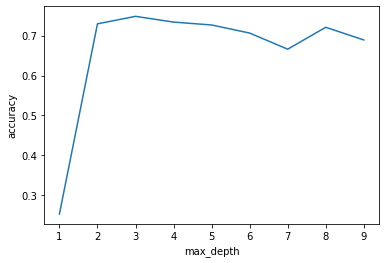

In [27]:
#Ntirage= 15
accuracies = []
for i in range(1, 10):
    clf =AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=i),n_estimators=200, learning_rate=2)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    accuracies.append(clf.score(X_test,y_test))
plt.plot([i for i in range(1, 10)], accuracies)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

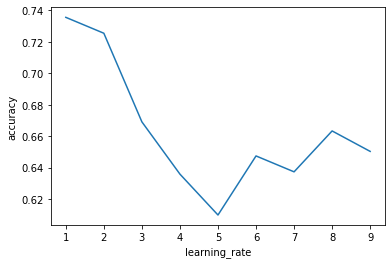

In [33]:
#Ntirage= 15
accuracies = []
for i in range(1, 10):
    clf =AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5),n_estimators=200, learning_rate=i)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    accuracies.append(clf.score(X_test,y_test))
plt.plot([i for i in range(1, 10)], accuracies)
plt.xlabel('learning_rate')
plt.ylabel('accuracy')
plt.show()

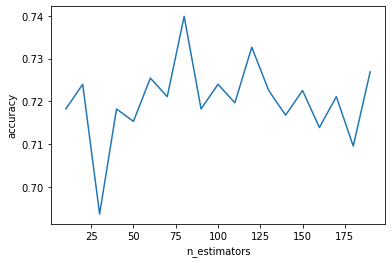

In [31]:
#Ntirage= 15
accuracies = []
for i in range(10, 200, 10):
    clf =AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5),n_estimators=i, learning_rate=2)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    accuracies.append(clf.score(X_test,y_test))
plt.plot([i for i in range(10, 200, 10)], accuracies)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()